# 상관관계 분석 활용 1
#### *기준금리와 부동산매매가격*

- 부동산 지수는 2017년 11월의 전국 아파트 매매 실거래 가격 평균을 100.0으로 하여 상대적인 값을 월별로 나타낸 것
- 기준금리는 한국은행에서 결정한 값을 기준으로 하여 한 달은 모두 같은 값으로 전처리하고, 같은 달에 두 번 이상의 기준금리 변동이 있다면 평균값으로 정함
![Corr4](img/Corr4.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지는 출력되지 않게 함
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 한글 font 설정
import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [3]:
# 2013.01 ~ 2022.11 부동산 지수
realEstate = [83, 83, 83.5, 83.8, 83.9, 83.7, 84.3, 84.6, 85.2, 85.7, 85.7, 85.7, 86.3
               , 86.8, 87.4, 87.4, 87.4, 87.4, 87.6, 88.2, 88.8, 89.4, 89.7, 89.9, 90.5
               , 91.1, 92, 92.7, 93.3, 93.8, 94.7, 95.4, 96, 96.4, 96.4, 95.8, 95.7
               , 95.8, 95.7, 95.7, 95.7, 96, 96.6, 97.2, 98.1, 98.8, 98.9, 98.6, 98.3
               , 98.5, 98.7, 98.6, 98.9, 99.4, 100.1, 100.2, 100.3, 100.3, 100, 99.6
               , 99.8, 100.1, 100.2, 100.2, 99.9, 99.7, 99.6, 100.8, 102.2, 102.4
               , 101.6, 100.8, 100.3, 99.9, 99.2, 99, 98.8, 99.1, 99.6, 99.9, 100.3
               , 100.8, 101.7, 102.7, 103.4, 104.7, 105.5, 105.5, 106.3, 108.3, 110.7
               , 112, 112.9, 114.4, 117, 119.8, 122.9, 125.1, 126.7, 128.3, 130.5
               , 133.4, 136.5, 139.7, 142.3, 143.8, 143, 141.6, 140.7, 140.6, 141.1
               , 141.8, 140.5, 139.8, 136.1, 133.4, 130.6, 126.2, 121.1]

In [4]:
# 2013.01 ~ 2022.11 기준 금리
interestRate = [2.75, 2.75, 2.75, 2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5
               , 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2, 2, 2, 2, 2, 1.75, 1.75
               , 1.75, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.25
               , 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25
               , 1.25, 1.25, 1.25, 1.25, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5
               , 1.5, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.5
               , 1.5, 1.5, 1.25, 1.25, 1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5
               , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
               , 0.75, 0.75, 0.75, 1, 1, 1.25, 1.25, 1.25, 1.5, 1.75, 1.75, 2.25, 2.5, 2.5
               , 3, 3.25]

In [5]:
# 데이터프레임 생성
data = {'부동산':realEstate, '금리': interestRate}
df = pd.DataFrame(data)
df

,부동산,금리
0,83.0,2.75
1,83.0,2.75
2,83.5,2.75
3,83.8,2.75
4,83.9,2.50
...,...,...
114,136.1,2.25
115,133.4,2.50
116,130.6,2.50
117,126.2,3.00


<AxesSubplot: xlabel='부동산', ylabel='금리'>

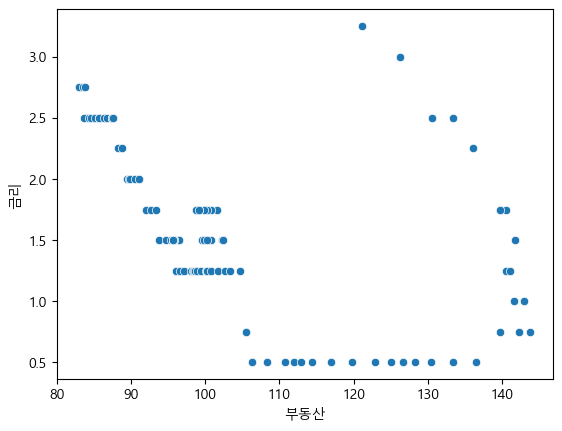

In [6]:
sns.scatterplot(data=df, x='부동산', y='금리')

In [7]:
# 상관계수
df.corr(method='pearson')

,부동산,금리
부동산,1.000000,-0.497677
금리,-0.497677,1.000000


In [8]:
originalData = {'부동산':realEstate, '금리': interestRate}

realEstateList = []
interestList = []
lastIndex = -1

In [9]:
# 부동산 지수가 143.8이 되기 전, 부동산 상승기 데이터만 가지고 다시 분석
for key, value in originalData.items():
    if key =='부동산':
        for i in range(0, len(value)):
            if value[i] == 143.8:
                break                # value값이 143.8을 만나면 break
            else:
                realEstateList.append(value[i])
                lastIndex = i
                
    else:   # 금리 데이터를 만났을 때
        for i in range(0, lastIndex + 1):
            interestList.append(value[i]) 

data = {'부동산지수': realEstateList, '금리':interestList}
df_new = pd.DataFrame(data)
df_new

,부동산지수,금리
0,83.0,2.75
1,83.0,2.75
2,83.5,2.75
3,83.8,2.75
4,83.9,2.50
...,...,...
100,130.5,0.50
101,133.4,0.50
102,136.5,0.50
103,139.7,0.75


In [10]:
# 피어슨 상관계수
coef = df_new.corr(method='pearson')
coef

,부동산지수,금리
부동산지수,1.000000,-0.854603
금리,-0.854603,1.000000


In [11]:
# 스피어만 상관계수
coef = df_new.corr(method='spearman')
coef

,부동산지수,금리
부동산지수,1.00000,-0.84496
금리,-0.84496,1.00000


In [12]:
# kendall 상관계수
coef = df_new.corr(method='kendall')
coef

,부동산지수,금리
부동산지수,1.000000,-0.719694
금리,-0.719694,1.000000


<AxesSubplot: xlabel='부동산지수', ylabel='금리'>

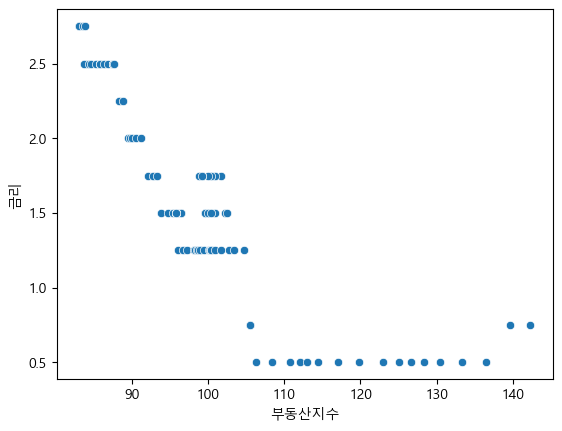

In [13]:
sns.scatterplot(data=df_new, x='부동산지수', y='금리')

<hr>

# 상관관계 분석 활용 2
#### *학생 10명의 영어시험과 수학시험 등수로 스피어만 상관분석 수행*

In [14]:
en = [4, 2, 1, 3, 10, 8, 9, 7, 6, 5]
math = [2, 1, 3, 4, 8, 7, 10, 5, 9, 6]

data = {'en':en, 'math':math}
rank = pd.DataFrame(data)
rank

,en,math
0,4,2
1,2,1
2,1,3
3,3,4
4,10,8
5,8,7
6,9,10
7,7,5
8,6,9
9,5,6


In [15]:
# 스피어만 상관계수
coef = rank.corr(method='spearman')
coef

,en,math
en,1.000000,0.818182
math,0.818182,1.000000


<AxesSubplot: xlabel='en', ylabel='math'>

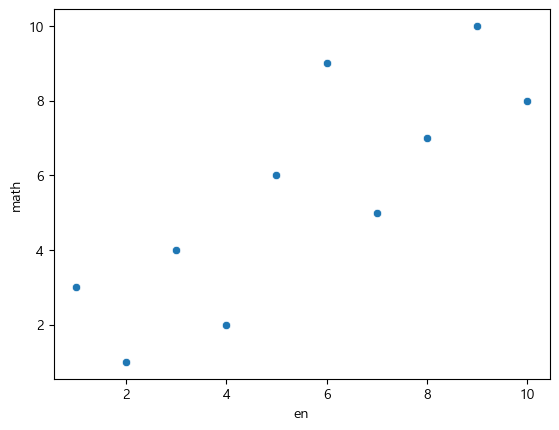

In [16]:
sns.scatterplot(data=rank, x='en', y='math')